In [1]:
import pandas as pd

* id : 개체 샘플 별 고유 ID
* class : 예측한 개체의 품종 (A,B,C)

In [2]:
sp_submission = pd.read_csv('raw_data/sample_submission.csv')

In [3]:
print(len(sp_submission))
sp_submission.head(2)

175


,id,class
0,TEST_000,A
1,TEST_001,A


In [4]:
test_data = pd.read_csv('raw_data/test.csv')

In [5]:
print(len(test_data))
test_data.head(2)

175


,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A


* 15개의 SNP 세부 정보
    * name : SNP 명
    * chrom : 염색체 정보
    * cm : Genetic distance
    * pos : 각 마커의 유전체상 위치 정보

In [6]:
snp_info_data = pd.read_csv('raw_data/snp_info.csv')

In [7]:
print(len(snp_info_data))
snp_info_data.head(2)

15


,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068


* id : 개체 고유 ID
* 개체정보
    * father : 개체의 가계 고유 번호 (0 : Unknown)
    * mother : 개체의 모계 고유 번호 (0 : Unknown)
* gender : 개체 성별 (0 : Unknown, 1 : female, 2 : male)
* trait : 개체 표현형 정보 
* 15개의 SNP 정보 : SNP_01 ~ SNP_15
* class : 개체의 품종 (A,B,C)

In [9]:
train_data = pd.read_csv('raw_data/train.csv')

In [10]:
print(len(train_data))
train_data.head(2)

262


,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C


In [13]:
train_data.describe()

,father,mother,gender,trait
count,262.0,262.0,262.0,262.000000
mean,0.0,0.0,0.0,1.736641
std,0.0,0.0,0.0,0.441298
min,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,1.000000
50%,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,2.000000
max,0.0,0.0,0.0,2.000000


<AxesSubplot: >

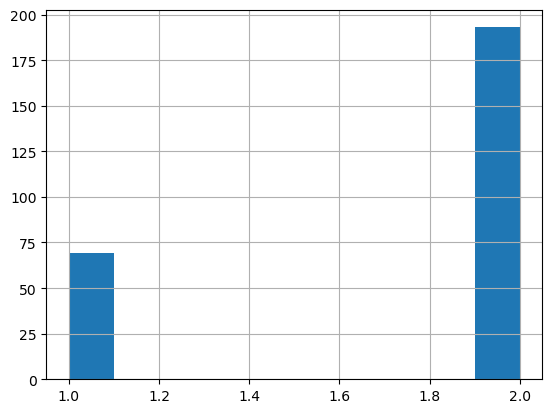

In [14]:
train_data['trait'].hist()

In [17]:
train_data.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [22]:
SNP_list = train_data.columns[train_data.columns.str.contains('SNP')].tolist()

In [21]:
for col_name in SNP_list:
    print('----')
    print('SNP id: ', col_name)
    print(train_data[col_name].unique())

----
SNP id:  SNP_01
['G G' 'A G' 'A A']
----
SNP id:  SNP_02
['A G' 'G G' 'A A']
----
SNP id:  SNP_03
['A A' 'C A' 'C C']
----
SNP id:  SNP_04
['G A' 'A A' 'G G']
----
SNP id:  SNP_05
['C A' 'A A' 'C C']
----
SNP id:  SNP_06
['A A' 'A G' 'G G']
----
SNP id:  SNP_07
['A A' 'G G' 'G A']
----
SNP id:  SNP_08
['G G' 'G A' 'A A']
----
SNP id:  SNP_09
['A A' 'G A' 'G G']
----
SNP id:  SNP_10
['G G' 'A G' 'A A']
----
SNP id:  SNP_11
['A G' 'A A' 'G G']
----
SNP id:  SNP_12
['A A' 'G A' 'G G']
----
SNP id:  SNP_13
['A A' 'G G' 'A G']
----
SNP id:  SNP_14
['A A' 'C C' 'C A']
----
SNP id:  SNP_15
['A A' 'G G' 'G A']


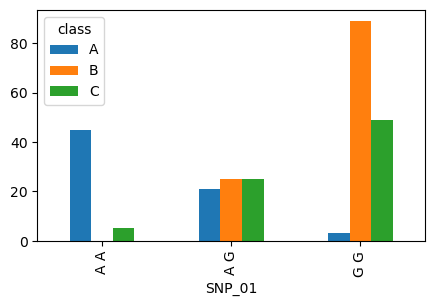

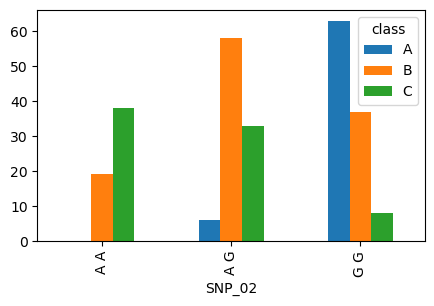

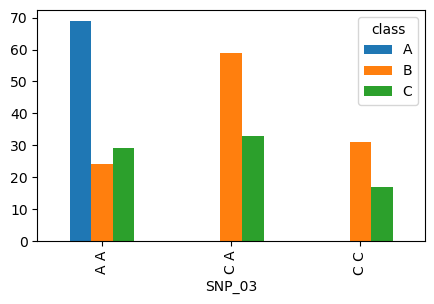

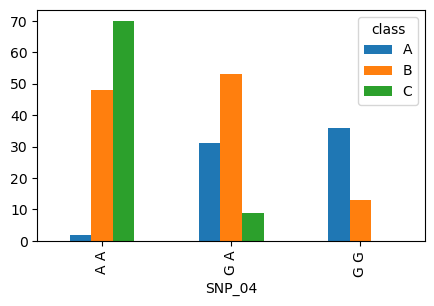

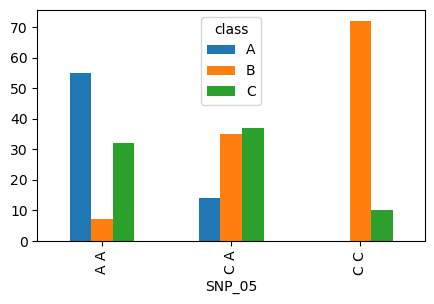

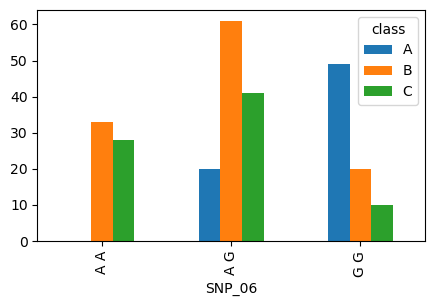

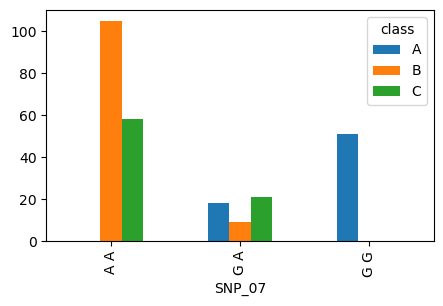

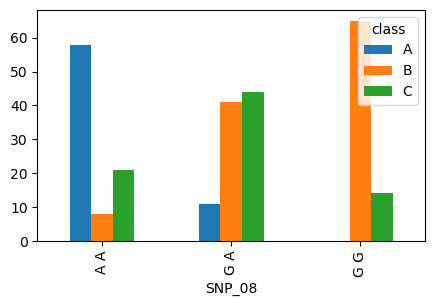

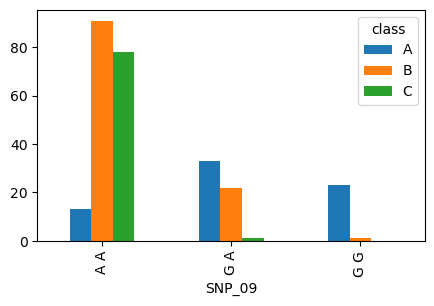

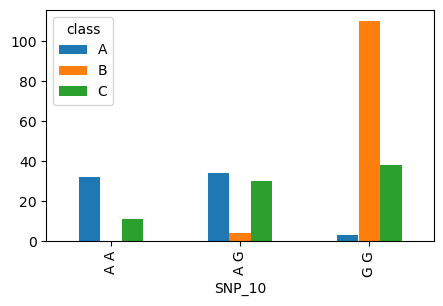

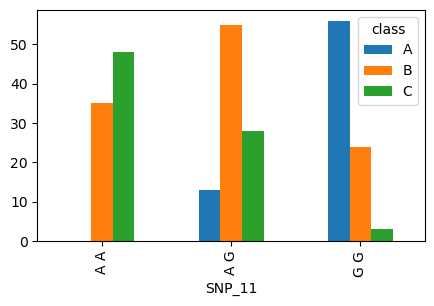

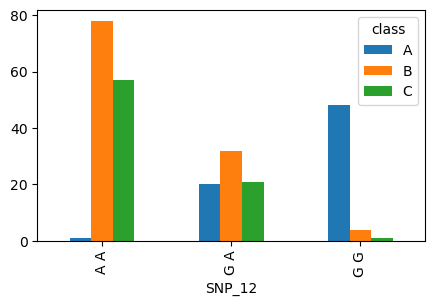

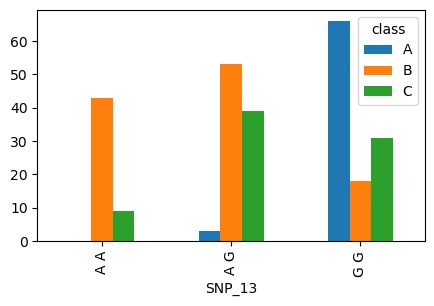

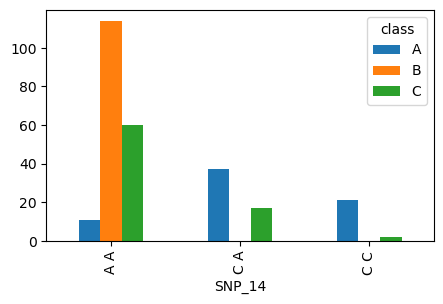

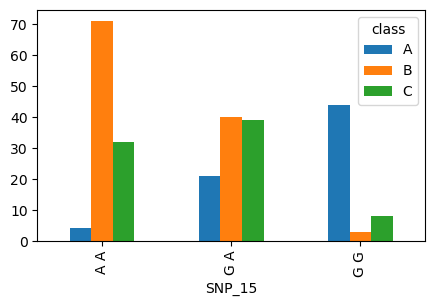

In [24]:
for g in train_data.columns[train_data.columns.str.contains('SNP')].tolist():
    train_data.groupby(g)['class'].value_counts().unstack().plot.bar(figsize=(5,3));